In [1]:
import numpy as np
from utils import *
%matplotlib notebook

In [2]:
L = 1
T = 1

h = .1
k = .01

r = k / h**2
print('r = k/h**2 = %g' % r)

Nx = int(np.ceil(L / h)) + 1
Nt = int(np.ceil(T / k)) + 1

print('Number of discretization on x:', Nx)
print('Number of discretization on t:', Nt)

r = k/h**2 = 1
Number of discretization on x: 11
Number of discretization on t: 101


In [3]:
@np.vectorize
def initial(x):
    return np.ones_like(x)

In [4]:
x = np.array([i * h for i in range(Nx)])
t = np.array([i * k for i in range(Nt)])

u0 = initial(x)

In [5]:
u = np.zeros((Nt, Nx))
u[0, :] = u0
N = Nx

A = (2 + 2 * r) * np.eye(N) - r * np.eye(N, k=1) - r * np.eye(N, k=-1)
B = (2 - 2 * r) * np.eye(N) + r * np.eye(N, k=1) + r * np.eye(N, k=-1)

A[0, 0] = A[-1, -1] = 2 + h
B[0, 0] = B[-1, -1] = -h

for j in range(Nt - 1):
    u[j + 1,] = np.linalg.solve(A, B @ u[j,])

In [6]:
print_table(u, x)

╒═══════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╕
│   x   │  0.0   │  0.1   │  0.2   │  0.3   │  0.4   │  0.5   │  0.6   │  0.7   │  0.8   │  0.9   │  1.0   │
╞═══════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│  j=0  │   1    │   1    │   1    │   1    │   1    │   1    │   1    │   1    │   1    │   1    │   1    │
├───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  j=1  │ 0.8908 │ 0.9707 │ 0.9922 │ 0.9979 │ 0.9994 │ 0.9997 │ 0.9994 │ 0.9979 │ 0.9922 │ 0.9707 │ 0.8908 │
├───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  j=2  │ 0.8624 │ 0.9293 │ 0.972  │  0.99  │ 0.9964 │ 0.9979 │ 0.9964 │  0.99  │ 0.972  │ 0.9293 │ 0.8624 │
├───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  j=3  │ 0.832  │ 

<IPython.core.display.Javascript object>


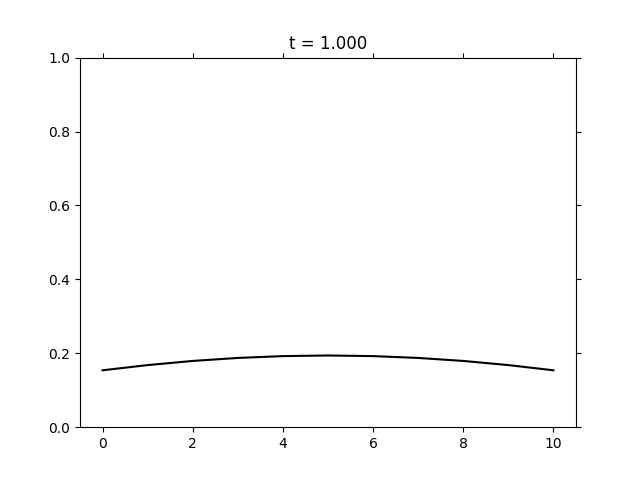

In [7]:
animate_line(u, t, sampling=1)

<IPython.core.display.Javascript object>


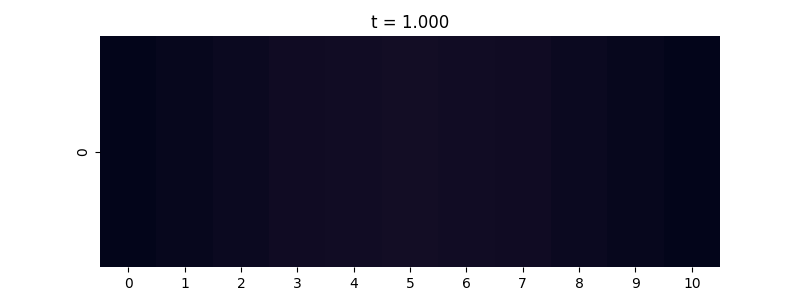

In [8]:
animate_heatmap(u, t, sampling=2)